<a href="https://colab.research.google.com/github/ChillakuruSaipranam/NFLAFB/blob/main/NFLAMFB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NFL American Football**

Connecting to google drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Loading the Dataset

In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/NFL/tracking_week_1.csv')

First few Rows

In [4]:
df.head(5)

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


To know all the column names

In [5]:
print(len(df.columns)) #To know
print(df.columns)

18
Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'frameType',
       'time', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a',
       'dis', 'o', 'dir', 'event'],
      dtype='object')


Describe the columns like extracting mean,median,minimum,maxmimum and standard deviation.

In [6]:
print(df.describe())

             gameId        playId         nflId       frameId  jerseyNumber  \
count  7.104700e+06  7.104700e+06  6.795800e+06  7.104700e+06  6.795800e+06   
mean   2.022091e+09  2.024279e+03  4.718625e+04  8.693164e+01  4.808540e+01   
std    7.693544e+01  1.227634e+03  5.050182e+03  5.901554e+01  3.081648e+01   
min    2.022091e+09  5.500000e+01  2.551100e+04  1.000000e+00  1.000000e+00   
25%    2.022091e+09  9.550000e+02  4.338400e+04  4.000000e+01  2.100000e+01   
50%    2.022091e+09  1.995000e+03  4.621400e+04  8.100000e+01  5.100000e+01   
75%    2.022091e+09  3.043000e+03  5.249800e+04  1.260000e+02  7.500000e+01   
max    2.022091e+09  5.120000e+03  5.517300e+04  6.970000e+02  9.900000e+01   

                  x             y             s             a           dis  \
count  7.104700e+06  7.104700e+06  7.104700e+06  7.104700e+06  7.104700e+06   
mean   6.087936e+01  2.682726e+01  1.359180e+00  9.440965e-01  1.389657e-01   
std    2.456882e+01  7.696377e+00  1.889584e+00  1.

**Key Insights from the Descriptive Summary**

*  Game and Play Identifiers (gameId, playId)
Represent unique identifiers for games and plays.
All games are from the 2022 season (gameId constant year).
Wide play variety per game, with playId ranging from 55 to 5120.**Use:** Indexing and grouping by game or play for detailed analysis.
Player Details (nflId, jerseyNumber)

* Missing values suggest some data tracks only the ball, not players.
Jersey numbers are evenly distributed across the roster (mean 48).**Use:** Tracking individual player stats and performance.
Field Position (x, y)


* Player positions align with football field dimensions.
A few negative values may indicate tracking errors.**Use:** Analyzing formations and player movement patterns.
Speed and Acceleration (s, a)

* Peak speeds (29 yards/sec) match elite athletic performance.
Extreme acceleration spikes (~56 yards/sec²) might be errors or rare events.**Use:** Evaluating athletic abilities and identifying standout players.
Movement (dis)

* Players typically move short distances between frames (mean 0.14 yards).
Larger displacements (7.6 yards) suggest dynamic plays (e.g., kickoffs).**Use:** Assessing activity levels and play intensity.
Orientation and Direction (o, dir)

* Players generally face forward (average orientation ~180°).
Full 360° coverage shows diverse directional movement.**Use:** Understanding routes, defensive setups, and play dynamics.

**Notable Observations**

Missing Data: Some columns lack complete player information, affecting analyses.

Outliers: Extreme values in speed, acceleration, and displacement might be errors or special events.

Skewed Distributions: Metrics like speed are right-skewed, with most players moving slower than the mean.

Purpose: To analyze the distribution of player speeds during plays.


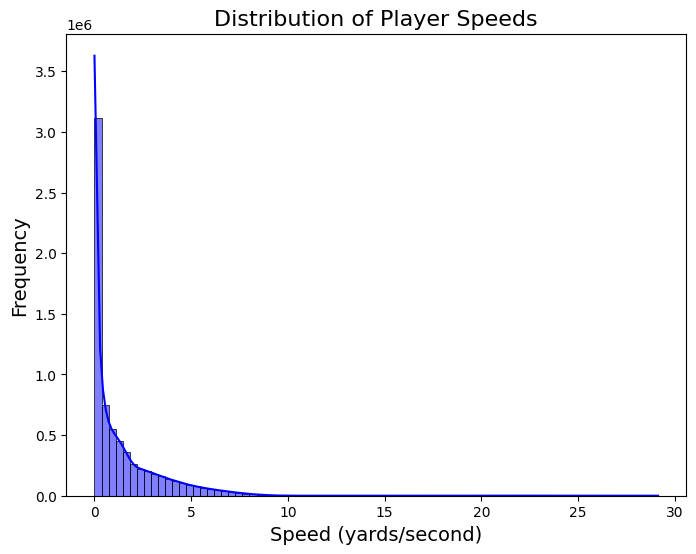

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['s'], bins=80, kde=True, color='blue')
plt.title('Distribution of Player Speeds', fontsize=16)
plt.xlabel('Speed (yards/second)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


Purpose: To visualize the spread of player positions (x and y) during plays.

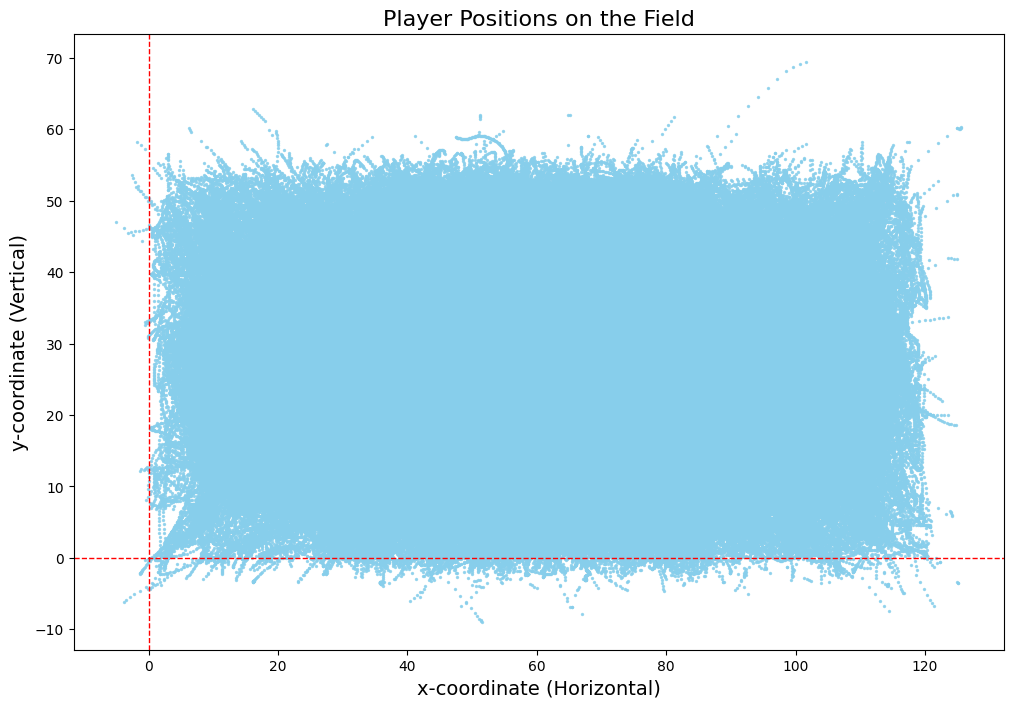

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['y'], alpha=0.8, s=2, color='skyblue')
plt.title('Player Positions on the Field', fontsize=16)
plt.xlabel('x-coordinate (Horizontal)', fontsize=14)
plt.ylabel('y-coordinate (Vertical)', fontsize=14)
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Mark the center
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()


Purpose: To visualize how player activity (e.g., speed) changes over frames.

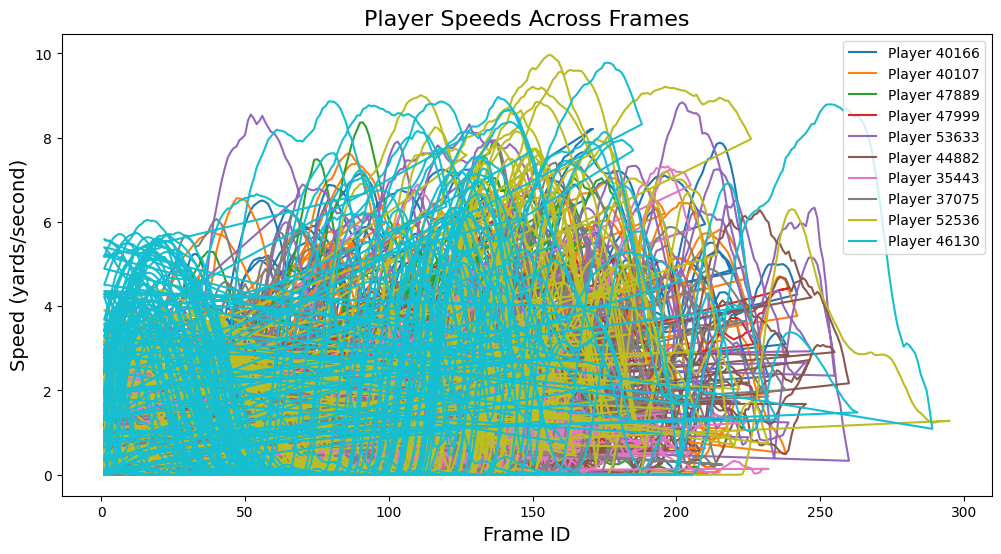

In [9]:
sampled_players = df['nflId'].dropna().sample(10, random_state=42)  # Sample 10 players
plt.figure(figsize=(12, 6))
for player_id in sampled_players:
    player_data = df[df['nflId'] == player_id]
    plt.plot(player_data['frameId'], player_data['s'], label=f'Player {int(player_id)}')
plt.title('Player Speeds Across Frames', fontsize=16)
plt.xlabel('Frame ID', fontsize=14)
plt.ylabel('Speed (yards/second)', fontsize=14)
plt.legend()
plt.show()


To know the type of data present in particular column

In [10]:
print(df.info(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104700 entries, 0 to 7104699
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   gameId         int64  
 1   playId         int64  
 2   nflId          float64
 3   displayName    object 
 4   frameId        int64  
 5   frameType      object 
 6   time           object 
 7   jerseyNumber   float64
 8   club           object 
 9   playDirection  object 
 10  x              float64
 11  y              float64
 12  s              float64
 13  a              float64
 14  dis            float64
 15  o              float64
 16  dir            float64
 17  event          object 
dtypes: float64(9), int64(3), object(6)
memory usage: 975.7+ MB
None


In [11]:
categorical_columns=df.select_dtypes(include=['object','category','bool']).columns
print(categorical_columns)
print("Number of Categorical columns:",len(categorical_columns))

Index(['displayName', 'frameType', 'time', 'club', 'playDirection', 'event'], dtype='object')
Number of Categorical columns: 6


In [12]:
descriptive_columns=df.select_dtypes(include=['number']).columns
print(descriptive_columns)
print("Number of Descriptive  Columns: ",len(descriptive_columns))

Index(['gameId', 'playId', 'nflId', 'frameId', 'jerseyNumber', 'x', 'y', 's',
       'a', 'dis', 'o', 'dir'],
      dtype='object')
Number of Descriptive  Columns:  12


In [13]:
import pandas as pd

# Identify categorical and descriptive columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
descriptive_columns = df.select_dtypes(include=['number']).columns

# Create a DataFrame with equal lengths for both lists
max_len = max(len(categorical_columns), len(descriptive_columns))
categorical_list = list(categorical_columns) + [''] * (max_len - len(categorical_columns))
descriptive_list = list(descriptive_columns) + [''] * (max_len - len(descriptive_columns))

# Combine into a single table
table = pd.DataFrame({
    'Categorical Columns': categorical_list,
    'Descriptive Columns': descriptive_list
})

# Display the table
print(table.to_markdown(index=False))


| Categorical Columns   | Descriptive Columns   |
|:----------------------|:----------------------|
| displayName           | gameId                |
| frameType             | playId                |
| time                  | nflId                 |
| club                  | frameId               |
| playDirection         | jerseyNumber          |
| event                 | x                     |
|                       | y                     |
|                       | s                     |
|                       | a                     |
|                       | dis                   |
|                       | o                     |
|                       | dir                   |


Missing Values

In [14]:
df.isnull().sum()

,0
gameId,0
playId,0
nflId,308900
displayName,0
frameId,0
frameType,0
time,0
jerseyNumber,308900
club,0
playDirection,0


**Number of MIssing values**

In [29]:
a=len(df.isnull())
print("Number of Missing Values are :",a)

Number of Missing Values are : 7104700


In [22]:
df_cleaned=df.dropna()
df_cleaned

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
42,2022091200,64,35459.0,Kareem Jackson,43,BEFORE_SNAP,2022-09-13 00:16:07.7,22.0,DEN,right,51.88,29.07,0.34,0.26,0.03,261.81,303.38,line_set
64,2022091200,64,35459.0,Kareem Jackson,65,BEFORE_SNAP,2022-09-13 00:16:09.9,22.0,DEN,right,50.70,29.39,0.68,0.36,0.07,262.63,297.92,man_in_motion
113,2022091200,64,35459.0,Kareem Jackson,114,SNAP,2022-09-13 00:16:14.8,22.0,DEN,right,50.29,29.43,1.13,1.62,0.11,240.06,133.16,ball_snap
126,2022091200,64,35459.0,Kareem Jackson,127,AFTER_SNAP,2022-09-13 00:16:16.1,22.0,DEN,right,53.10,26.61,4.66,2.37,0.46,204.08,147.79,handoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104350,2022090800,3696,54650.0,Christian Benford,1,BEFORE_SNAP,2022-09-09 03:07:20.7,47.0,BUF,left,21.03,19.37,0.83,0.34,0.08,75.23,200.13,huddle_break_offense
7104414,2022090800,3696,54650.0,Christian Benford,65,BEFORE_SNAP,2022-09-09 03:07:27.1,47.0,BUF,left,16.92,8.36,1.14,0.43,0.12,77.93,254.67,line_set
7104471,2022090800,3696,54650.0,Christian Benford,122,SNAP,2022-09-09 03:07:32.8,47.0,BUF,left,14.49,7.14,0.10,0.09,0.01,63.69,186.88,ball_snap
7104496,2022090800,3696,54650.0,Christian Benford,147,AFTER_SNAP,2022-09-09 03:07:35.3,47.0,BUF,left,12.48,6.53,3.02,1.76,0.29,24.97,246.99,pass_forward


**Cleaned Dataframe**

In [23]:
df_cleaned.isnull().sum()

,0
gameId,0
playId,0
nflId,0
displayName,0
frameId,0
frameType,0
time,0
jerseyNumber,0
club,0
playDirection,0


**To know the speed of one specific player**

Enter the Player ID (nflId): 45226


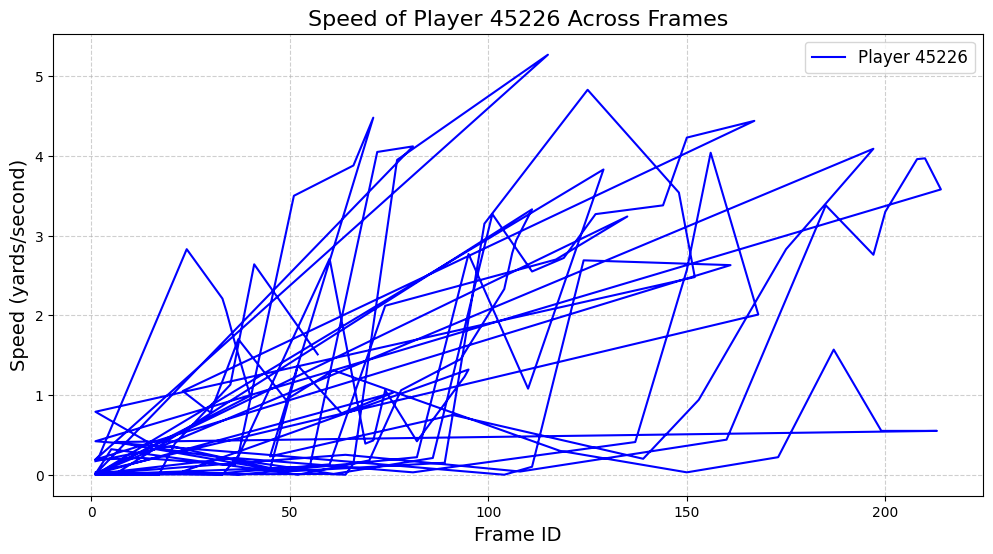

In [28]:
player_id = int(input("Enter the Player ID (nflId): "))

# Filter the data for the selected player
player_data = df_cleaned[df_cleaned['nflId'] == player_id]

# Plot the speed of the selected player across frames
plt.figure(figsize=(12, 6))
plt.plot(player_data['frameId'], player_data['s'], label=f'Player {int(player_id)}', color='blue')

# Add titles and labels
plt.title(f'Speed of Player {int(player_id)} Across Frames', fontsize=16)
plt.xlabel('Frame ID', fontsize=14)
plt.ylabel('Speed (yards/second)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


**TO know the position of Specific Player**

Enter the Player ID (nflId): 40166


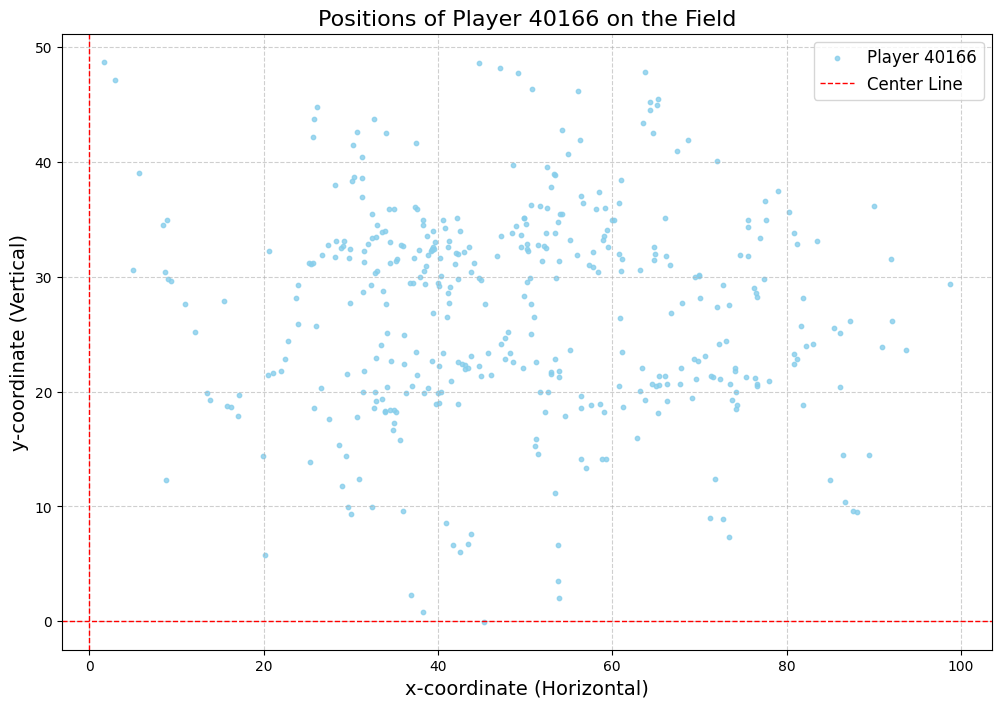

In [37]:

# Input the Player ID
player_id = int(input("Enter the Player ID (nflId): "))

# Filter the data for the entered Player ID
player_data = df_cleaned[df_cleaned['nflId'] == player_id]

# Check if the player exists in the dataset
if player_data.empty:
    print(f"No data found for Player ID: {player_id}")
else:

    # Plot the player's positions on the field
    plt.figure(figsize=(12, 8))
    plt.scatter(player_data['x'], player_data['y'], alpha=0.8, s=10, color='skyblue', label=f'Player {player_id}')
    plt.title(f'Positions of Player {player_id} on the Field', fontsize=16)
    plt.xlabel('x-coordinate (Horizontal)', fontsize=14)
    plt.ylabel('y-coordinate (Vertical)', fontsize=14)
    plt.axvline(0, color='red', linestyle='--', linewidth=1, label='Center Line')  # Mark the center
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.show()

